In [ ]:
import math
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

NodeLocation = Tuple[int, int]

class Graph:
    def __init__(self, 
        width: int,
        height: int,
    ):
        self.width = width
        self.height = height
        
        self.map = np.full((width, height), 0)
        
    
    def _in_graph(self, node: NodeLocation) -> bool:
        x, y = node
        if x >= 0 and x < self.width:
            if y >= 0 and y < self.height:
                return True
        return False
    
    def add_geography(self, 
        deserts: List[NodeLocation]=None, 
        streams: List[NodeLocation]=None, 
        obstacles: List[NodeLocation]=None,
    ):
        if deserts:
            for de in deserts:
                self.map[de[0], de[1]] = 1
        if streams:
            for st in streams:
                self.map[st[0], st[1]] = 2
        if obstacles:
            for ob in obstacles:
                self.map[ob[0], ob[1]] = 3
    
    def neighbors(self, node: NodeLocation) -> List[NodeLocation]:
        dirs = [
            [1, 0], [0, 1], [-1, 0], [0, -1],
            [1, 1], [1, -1], [-1, 1], [-1, -1]
        ]
        result = []
        for dir in dirs:
            neighbor = [node[0] + dir[0], node[1] + dir[1]]
            if self._in_graph(neighbor):
                result.append(neighbor)
        return result

    def cost(self, current: NodeLocation, next: NodeLocation):
        movement = [next[0] - current[0], next[1] - current[1]]
        if movement in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
            move_cost = 1
        elif movement in [[1, 1], [1, -1], [-1, 1], [-1, -1]]:
            move_cost = math.sqrt(2)
        
        if self.map[next[0], next[1]] == 1: # deserts
            geo_cost = 4
        elif self.map[next[0], next[1]] == 2: # streams
            geo_cost = 2
        elif self.map[next[0], next[1]] == 3: # obstacle
            geo_cost = int('inf')
        else:
            geo_cost = 0
        
        return move_cost + geo_cost
    
    def draw(self):
        geo_colors = {
            1: 'wheat',
            2: 'blue',
            0: 'white',
            3: 'gray'
        }
        fig, ax = plt.subplots()
        
        for row in range(self.width):
            for col in range(self.height):
                
        
        

C:\Users\junzhe\AppData\Local\Temp\ipykernel_6412\3725887641.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)  # 使用tab10颜色图


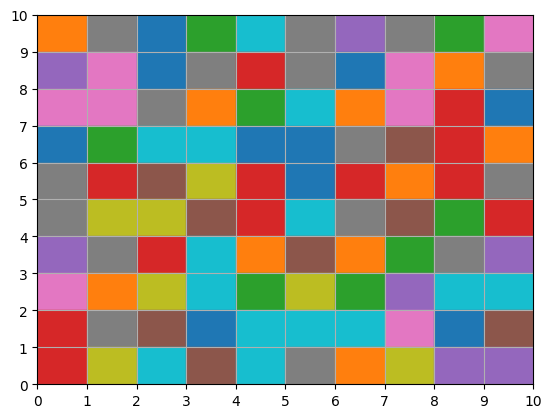

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建10x10的网格
nrows, ncols = 10, 10
data = np.random.randint(0, 10, size=(nrows, ncols))  # 随机数据

# 定义颜色
# 这里我们使用预定义的颜色表，但也可以自定义颜色
colors = list(mcolors.CSS4_COLORS.values())  # CSS4提供的颜色
cmap = plt.cm.get_cmap("tab10", 10)  # 使用tab10颜色图

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制网格图
for row in range(nrows):
    for col in range(ncols):
        color = cmap(data[row, col] / 10.0)  # 根据数据的值选择颜色
        ax.add_patch(plt.Rectangle((col, nrows - row - 1), 1, 1, color=color))

# 设置坐标轴
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_xticks(np.arange(ncols + 1))
ax.set_yticks(np.arange(nrows + 1))
ax.grid(True)

plt.show()


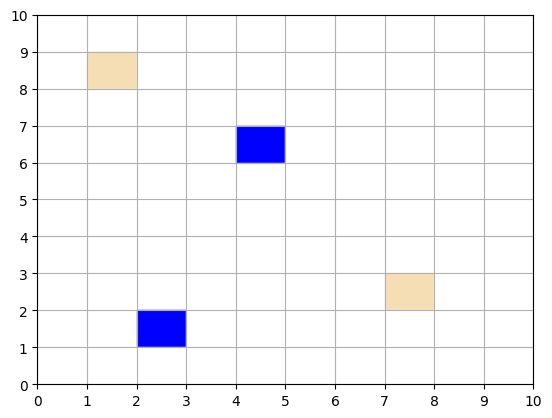

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

# 验证颜色名称是否合法
valid_colors = list(mcolors.CSS4_COLORS.keys())  # CSS4中有效的颜色名称

# 定义网格大小
nrows, ncols = 10, 10

# 创建颜色矩阵，默认为白色
color_matrix = np.full((nrows, ncols), 'white')

# 设置特定的单元格颜色
# 使用确保是有效的颜色名称
specified_colors = {
    (1, 1): 'wheat',  # 第2行第2列设置为黄色
    (3, 4): 'blue',  # 第4行第5列设置为蓝色
    (7, 7): 'wheat',  # 第8行第8列设置为黄色
    (8, 2): 'blue'  # 第9行第3列设置为蓝色
}

# 验证所有指定的颜色名称都是有效的
for pos, color in specified_colors.items():
    if color not in valid_colors:
        raise ValueError(f"Invalid color specified: {color}")

# 更新颜色矩阵
for pos, color in specified_colors.items():
    color_matrix[pos] = color  # 设置特定单元格的颜色

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制网格图
for row in range(nrows):
    for col in range(ncols):
        color = color_matrix[row, col]  # 从颜色矩阵中获取颜色
        ax.add_patch(patches.Rectangle((col, nrows - row - 1), 1, 1, color=color))  # 绘制矩形

# 设置坐标轴
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_xticks(np.arange(ncols + 1))
ax.set_yticks(np.arange(nrows + 1))
ax.grid(True)

plt.show()

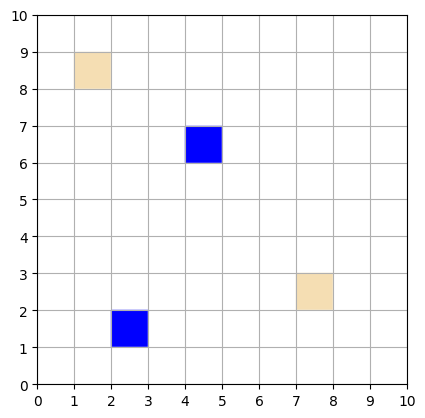

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 定义网格大小
nrows, ncols = 10, 10

# 创建颜色矩阵，默认为白色
color_matrix = np.full((nrows, ncols), 'white')

# 设置特定的单元格颜色
specified_colors = {
    (1, 1): 'wheat',  # 第2行第2列设置为黄色
    (3, 4): 'blue',  # 第4行第5列设置为蓝色
    (7, 7): 'wheat',  # 第8行第8列设置为黄色
    (8, 2): 'blue'  # 第9行第3列设置为蓝色
}

# 更新颜色矩阵
for pos, color in specified_colors.items():
    color_matrix[pos[0], pos[1]] = color

# 创建图形和轴
fig, ax = plt.subplots()

# 确保网格中的单元格是正方形
ax.set_aspect('equal', adjustable='box')  # 使 x 轴和 y 轴具有相同的比例

# 绘制网格图
for row in range(nrows):
    for col in range(ncols):
        color = color_matrix[row, col]  # 从颜色矩阵中获取颜色
        ax.add_patch(patches.Rectangle((col, nrows - row - 1), 1, 1, color=color))  # 绘制矩形

# 设置坐标轴和网格
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_xticks(np.arange(ncols + 1))
ax.set_yticks(np.arange(nrows + 1))
ax.grid(True)

plt.show()


In [19]:
valid_colors = list(mcolors.CSS4_COLORS.keys())  # CSS4中有效的颜色名称
valid_colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 